In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import wilcoxon


In [2]:
#import stat results
stat_results = {}

for filtered in ['exclusion_filtered']: 
    stat_results[filtered] = {}
    for correction in ['uncorrected','GC_corrected','GC_map_corrected']:
        stat_results[filtered][correction] = pd.read_csv('../GC_correction/files/'+filtered+'.'+correction+'.tsv', sep='\t')
    for correction in ['CNA-corrected-TFBS']:
        stat_results[filtered][correction] = pd.read_csv('files/'+correction+'.correlations.tsv', sep='\t')


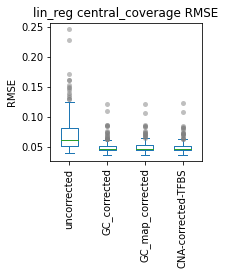

central_coverage
uncorrected           0.070591
GC_corrected          0.048847
GC_map_corrected      0.049368
CNA-corrected-TFBS    0.049062
dtype: float64
GC vs uncorrected: stat: 1421.0 pval: 1.0E-58
GC vs GC_map: stat: 28583.0 pval: 8.8E-04
GC vs GC_CNA: stat: 29055.0 pval: 1.9E-03




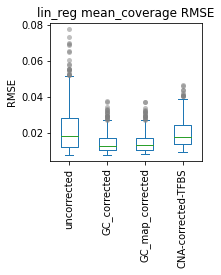

mean_coverage
uncorrected           0.022433
GC_corrected          0.014499
GC_map_corrected      0.014676
CNA-corrected-TFBS    0.019622
dtype: float64
GC vs uncorrected: stat: 2347.0 pval: 1.1E-55
GC vs GC_map: stat: 21245.0 pval: 1.1E-11
GC vs GC_CNA: stat: 0.0 pval: 1.6E-63




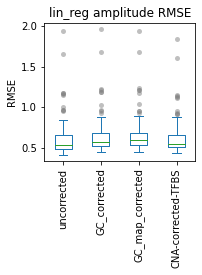

amplitude
uncorrected           0.586251
GC_corrected          0.615434
GC_map_corrected      0.631006
CNA-corrected-TFBS    0.597169
dtype: float64
GC vs uncorrected: stat: 1684.0 pval: 7.8E-58
GC vs GC_map: stat: 14421.0 pval: 1.3E-23
GC vs GC_CNA: stat: 10875.0 pval: 1.4E-31




In [3]:
#make boxplots and run wilcoxon tests
for feature_type in ['central_coverage','mean_coverage','amplitude']:
    boxplot_data = pd.DataFrame()
    for filtered in ['exclusion_filtered']:
        for correction in ['uncorrected','GC_corrected','GC_map_corrected','CNA-corrected-TFBS']:
            current_data = stat_results[filtered][correction]['lin-reg-RMSE_'+feature_type].copy()
            current_data.name = correction
            boxplot_data = boxplot_data.append(current_data)

    fig,ax = plt.subplots(1, figsize=(3,4))
    ax.set_title('lin_reg '+feature_type+' RMSE')
    ax.set_ylabel('RMSE')

    boxplot_data.T.plot.box(ax = ax, flierprops = {'marker':'.','markersize':10,'alpha':.5,'markerfacecolor':'grey','markeredgecolor':'none'})
    ax.tick_params(axis = 'x', rotation=90)
    #fig.tight_layout()
    fig.subplots_adjust(bottom = 0.4, left = 0.2)
    fig.savefig('plots/'+feature_type+'_mappability_RMSE_plot.pdf')
    plt.show()
    print(feature_type)
    print(boxplot_data.loc[['uncorrected','GC_corrected','GC_map_corrected','CNA-corrected-TFBS']].mean(axis = 1))

    #GC vs GC map
    stat,wilcoxon_pval = wilcoxon(boxplot_data.loc['GC_corrected'],boxplot_data.loc['uncorrected'])
    print('GC vs uncorrected: stat:',stat,'pval:','{:.1E}'.format(wilcoxon_pval))
    
    #GC vs GC map
    stat,wilcoxon_pval = wilcoxon(boxplot_data.loc['GC_corrected'],boxplot_data.loc['GC_map_corrected'])

    print('GC vs GC_map: stat:',stat,'pval:','{:.1E}'.format(wilcoxon_pval))

    #GC vs CNA
    stat,wilcoxon_pval = wilcoxon(boxplot_data.loc['GC_corrected'],boxplot_data.loc['CNA-corrected-TFBS'])

    print('GC vs GC_CNA: stat:',stat,'pval:','{:.1E}'.format(wilcoxon_pval))

    print('\n')


In [4]:
boxplot_data

,0,1,2,3,4,5,6,7,8,9,...,367,368,369,370,371,372,373,374,375,376
uncorrected,0.482583,0.556791,0.543539,0.483441,0.534599,0.475379,0.487444,0.770244,0.653112,0.752421,...,0.458811,0.460749,0.604300,0.513642,0.487501,0.740824,0.460982,0.511599,0.750178,0.840159
GC_corrected,0.529746,0.580089,0.564934,0.541357,0.568482,0.481541,0.512255,0.789602,0.688287,0.761038,...,0.458995,0.477130,0.607394,0.550959,0.530695,0.770288,0.553529,0.570100,0.786473,0.868091
GC_map_corrected,0.549709,0.590608,0.562681,0.618316,0.599756,0.536302,0.558397,0.796078,0.678898,0.776890,...,0.527693,0.492216,0.676408,0.541012,0.591135,0.789097,0.636047,0.603336,0.778205,0.876546
CNA-corrected-TFBS,0.533205,0.571592,0.544755,0.509457,0.546646,0.461570,0.501011,0.752479,0.692727,0.714793,...,0.483568,0.474405,0.621174,0.545997,0.532830,0.724888,0.553602,0.539325,0.797149,0.840249
